In [1]:
import sys
sys.path.append('../')
from config_sing import *

You are on Duke Server: Singularity: Proj CombEffect
BASE DIRECTORY:     /mount/work
PATH OF SOURCE:     /mount/work/source
PATH OF EXECUTABLE: /mount/work/exe
PATH OF ANNOTATION: /mount/work/annotation
PATH OF PROJECT:    /mount/project
PATH OF RESULTS:    /mount/work/out/proj_combeffect



In [6]:
import multiprocessing
from sklearn.datasets import make_blobs

In [3]:
multiprocessing.cpu_count()

56

In [4]:
from sklearn.datasets import load_digits
from MulticoreTSNE import MulticoreTSNE as TSNE
from matplotlib import pyplot as plt

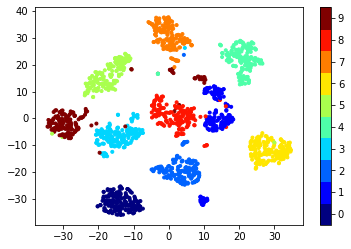

CPU times: user 17.1 s, sys: 207 ms, total: 17.3 s
Wall time: 10.8 s


In [5]:
%%time
digits = load_digits()
embeddings = TSNE(n_jobs=4).fit_transform(digits.data)
vis_x = embeddings[:, 0]
vis_y = embeddings[:, 1]
plt.scatter(vis_x, vis_y, c=digits.target, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

In [25]:
digits = load_digits()
digits.target[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
print(digits.data.shape)

(1797, 64)


In [16]:
%%time
embeddings = TSNE(n_jobs=1).fit_transform(digits.data)

CPU times: user 12.6 s, sys: 13 ms, total: 12.6 s
Wall time: 12.6 s


In [17]:
%%time
embeddings = TSNE(n_jobs=2).fit_transform(digits.data)

CPU times: user 19.4 s, sys: 30.8 ms, total: 19.5 s
Wall time: 10.7 s


In [18]:
%%time
embeddings = TSNE(n_jobs=4).fit_transform(digits.data)

CPU times: user 16.5 s, sys: 93.3 ms, total: 16.6 s
Wall time: 10.2 s


In [7]:
%%time
embeddings = TSNE(n_jobs=10).fit_transform(digits.data)

CPU times: user 16.7 s, sys: 175 ms, total: 16.9 s
Wall time: 10.5 s


In [ ]:
%%time
embeddings = TSNE(n_jobs=20).fit_transform(digits.data)

In [7]:
os.listdir(FD_RES)

['input_score',
 'scratch',
 'database',
 '.ipynb_checkpoints',
 'nuc',
 'count_fragment',
 'coverage',
 'model_linear',
 'log',
 'annotation',
 'annotation_fragment',
 'peak',
 'source',
 'data',
 'upload']

In [18]:
n_samples = 1000
n_centers = 5

# Generate 3 blobs with 2 classes where the second blob contains
# half positive samples and half negative samples. Probability in this
# blob is therefore 0.5.
#centers = [(-5, -5), (0, 0), (5, 5)]
X, y = make_blobs(
    n_samples=n_samples, 
    n_features=2, 
    cluster_std=1.0,
    centers=n_center, 
    shuffle=False, 
    random_state=42)

In [19]:
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


In [20]:
%%time
embeddings = TSNE(n_jobs=4).fit_transform(X)

CPU times: user 7.51 s, sys: 88.9 ms, total: 7.6 s
Wall time: 4.9 s


In [47]:
%%time
embeddings = TSNE(n_jobs=10).fit_transform(X)

CPU times: user 2min 1s, sys: 332 ms, total: 2min 1s
Wall time: 1min 15s


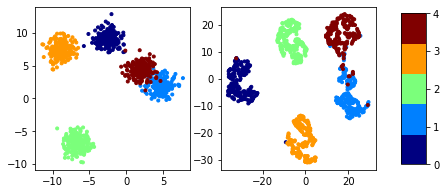

In [32]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(7, 3))

vis_x = X[:, 0]
vis_y = X[:, 1]
ax = axes[0]
im = ax.scatter(vis_x, vis_y, c=y, cmap=plt.cm.get_cmap("jet", n_center), marker='.')

vis_x = embeddings[:, 0]
vis_y = embeddings[:, 1]
ax = axes[1]
im = ax.scatter(vis_x, vis_y, c=y, cmap=plt.cm.get_cmap("jet", n_center), marker='.')

fig.subplots_adjust(right=0.8)
cax  = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(im, cax=cax)

In [15]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [14]:
type(tmp)

matplotlib.collections.PathCollection

In [ ]:
vis_x = X[:, 0]
vis_y = X[:, 1]
plt.scatter(vis_x, vis_y, c=y, cmap=plt.cm.get_cmap("jet", n_center), marker='.')
plt.colorbar(ticks=range(n_centers))
plt.clim(-0.5, n_centers-0.5)
plt.show()

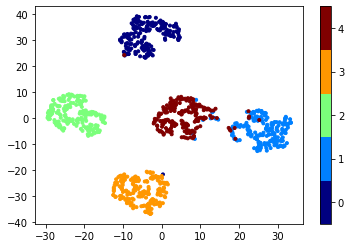

In [42]:
vis_x = embeddings[:, 0]
vis_y = embeddings[:, 1]
plt.scatter(vis_x, vis_y, c=y, cmap=plt.cm.get_cmap("jet", n_center), marker='.')
plt.colorbar(ticks=range(n_center))
plt.clim(-0.5, n_center-0.5)
plt.show()

In [50]:
os.getcwd()

'/mount/project/41_fragment_database'

In [51]:
embedding.shape

NameError: name 'embedding' is not defined